## DATA PREPARATION

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Dataset.csv')

How to Add an Index Field Using Python

In [3]:
data['index']=data.index
data


,ID,Name,Age,Gender,Income,City,index
0,1,Alice,25,F,50000.0,New York,0
1,2,Bob,30,Male,60000.0,Los Angeles,1
2,3,Charlie,35,M,80000.0,Chicago,2
3,4,David,45,Male,45000.0,New York,3
4,5,Eva,29,F,NaN,San Francisco,4
5,6,Frank,50,Male,200000.0,Houston,5
6,7,Grace,27,Female,75000.0,Miami,6
7,8,Hank,32,M,70000.0,Boston,7
8,9,Ivy,28,Female,85000.0,Seattle,8
9,10,Jack,40,Male,300000.0,Los Angeles,9


How to Re Express Categorical Field Values Using Python

In [4]:
data['gender_processed']= data['Gender'].replace({'M':'Male','F':'Female'})
data

,ID,Name,Age,Gender,Income,City,index,gender_processed
0,1,Alice,25,F,50000.0,New York,0,Female
1,2,Bob,30,Male,60000.0,Los Angeles,1,Male
2,3,Charlie,35,M,80000.0,Chicago,2,Male
3,4,David,45,Male,45000.0,New York,3,Male
4,5,Eva,29,F,NaN,San Francisco,4,Female
5,6,Frank,50,Male,200000.0,Houston,5,Male
6,7,Grace,27,Female,75000.0,Miami,6,Female
7,8,Hank,32,M,70000.0,Boston,7,Male
8,9,Ivy,28,Female,85000.0,Seattle,8,Female
9,10,Jack,40,Male,300000.0,Los Angeles,9,Male


In [5]:
data['gender_numeric']= data['gender_processed'].replace({'Male':1,'Female':0})
data

C:\Users\raghv\AppData\Local\Temp\ipykernel_28160\344551999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender_numeric']= data['gender_processed'].replace({'Male':1,'Female':0})


,ID,Name,Age,Gender,Income,City,index,gender_processed,gender_numeric
0,1,Alice,25,F,50000.0,New York,0,Female,0
1,2,Bob,30,Male,60000.0,Los Angeles,1,Male,1
2,3,Charlie,35,M,80000.0,Chicago,2,Male,1
3,4,David,45,Male,45000.0,New York,3,Male,1
4,5,Eva,29,F,NaN,San Francisco,4,Female,0
5,6,Frank,50,Male,200000.0,Houston,5,Male,1
6,7,Grace,27,Female,75000.0,Miami,6,Female,0
7,8,Hank,32,M,70000.0,Boston,7,Male,1
8,9,Ivy,28,Female,85000.0,Seattle,8,Female,0
9,10,Jack,40,Male,300000.0,Los Angeles,9,Male,1


In [6]:
del data['Gender']

In [ ]:
data

In [7]:
del data['gender_processed']
data

,ID,Name,Age,Income,City,index,gender_numeric
0,1,Alice,25,50000.0,New York,0,0
1,2,Bob,30,60000.0,Los Angeles,1,1
2,3,Charlie,35,80000.0,Chicago,2,1
3,4,David,45,45000.0,New York,3,1
4,5,Eva,29,NaN,San Francisco,4,0
5,6,Frank,50,200000.0,Houston,5,1
6,7,Grace,27,75000.0,Miami,6,0
7,8,Hank,32,70000.0,Boston,7,1
8,9,Ivy,28,85000.0,Seattle,8,0
9,10,Jack,40,300000.0,Los Angeles,9,1


How to Standardise Numeric Fields Using Python

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Standardized_Age', 'Standardized_Income']] = scaler.fit_transform(data[['Age', 'Income']])

data

,ID,Name,Age,Income,City,index,gender_numeric,Standardized_Age,Standardized_Income
0,1,Alice,25,50000.0,New York,0,0,-1.151161,-0.707908
1,2,Bob,30,60000.0,Los Angeles,1,1,-0.518655,-0.584196
2,3,Charlie,35,80000.0,Chicago,2,1,0.113851,-0.336772
3,4,David,45,45000.0,New York,3,1,1.378863,-0.769764
4,5,Eva,29,NaN,San Francisco,4,0,-0.645156,NaN
5,6,Frank,50,200000.0,Houston,5,1,2.011370,1.147773
6,7,Grace,27,75000.0,Miami,6,0,-0.898159,-0.398628
7,8,Hank,32,70000.0,Boston,7,1,-0.265653,-0.460484
8,9,Ivy,28,85000.0,Seattle,8,0,-0.771657,-0.274916
9,10,Jack,40,300000.0,Los Angeles,9,1,0.746357,2.384894


In [9]:
del data['Age']


How to Identify Outliers Using Python

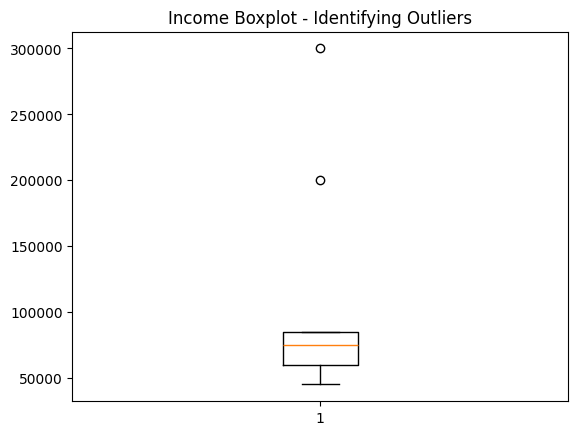

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(data['Income'].dropna())  # Dropping NaN values for income
plt.title('Income Boxplot - Identifying Outliers')
plt.show()

Using Z value

Z value is the standardised distance of the data value from mean

z = (Data value - mean)/Standard deviation


In [13]:
mean = np.mean(data['Income'])
std = np.std(data['Income'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 107222.22222222222
std. deviation is 80832.85605051916


In [14]:
threshold = 2
outlier = []
for i in data['Income']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [300000.0]
